In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# STEP 1. Скачайте датасет.

Download the Adult training data set: http://archive.ics.uci.edu/ml/datasets/Adult
(file adult.data)

In [2]:
# !wget http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

In [3]:
!head adult.data

39, State-gov, 77516, Bachelors, 13, Never-married, Adm-clerical, Not-in-family, White, Male, 2174, 0, 40, United-States, <=50K
50, Self-emp-not-inc, 83311, Bachelors, 13, Married-civ-spouse, Exec-managerial, Husband, White, Male, 0, 0, 13, United-States, <=50K
38, Private, 215646, HS-grad, 9, Divorced, Handlers-cleaners, Not-in-family, White, Male, 0, 0, 40, United-States, <=50K
53, Private, 234721, 11th, 7, Married-civ-spouse, Handlers-cleaners, Husband, Black, Male, 0, 0, 40, United-States, <=50K
28, Private, 338409, Bachelors, 13, Married-civ-spouse, Prof-specialty, Wife, Black, Female, 0, 0, 40, Cuba, <=50K
37, Private, 284582, Masters, 14, Married-civ-spouse, Exec-managerial, Wife, White, Female, 0, 0, 40, United-States, <=50K
49, Private, 160187, 9th, 5, Married-spouse-absent, Other-service, Not-in-family, Black, Female, 0, 0, 16, Jamaica, <=50K
52, Self-emp-not-inc, 209642, HS-grad, 9, Married-civ-spouse, Exec-managerial, Husband, White, Male, 0, 0, 45, United-States, >50K
31, 

# Step 2. Поймите формат и зачитайте adult.data в переменную df. Используйте cols чтобы дать нормальные названия колонкам.

Обратите внимание на формат!

In [4]:
cols = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'result']

In [5]:
df = pd.read_csv("adult.data", names=cols, sep=", ")

/home/khomyak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [6]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Сколько мужчин и женщин?

In [7]:
df['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

# Средний возраст мужчин и женщин?

In [8]:
df.groupby('sex')['age'].mean()

sex
Female    36.858230
Male      39.433547
Name: age, dtype: float64

# Какая доля граждан США (United-States) в данном датасете?

In [9]:
len(df[df['native-country'].str.contains('United')].index)/len(df.index)

0.895857006848684

# Нарисуйте распределние образования людей (используйте bar plot)

Подпишите график и оси.

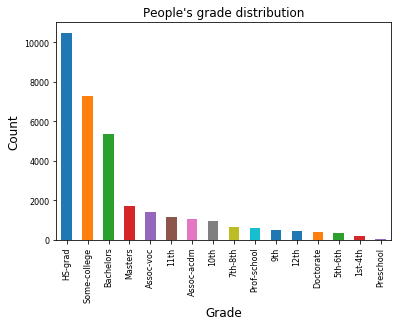

In [10]:
df_ed = df['education'].value_counts()
ax = df_ed.plot(kind='bar', title ="People's grade distribution", fontsize=8)
ax.set_xlabel("Grade", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()

# Какое среднее значние и квадратичное отклонение (std) fnlwgt (”final weight”) разведенных (divorced people) людей. Нарисуйте гистрограмму (Какое распределение оно вам напоминает?)

In [11]:
df[df['marital-status'].str.contains('Divorced')].fnlwgt.mean()

185802.79045689848

In [12]:
df[df['marital-status'].str.contains('Divorced')].fnlwgt.std()

105646.78945933603

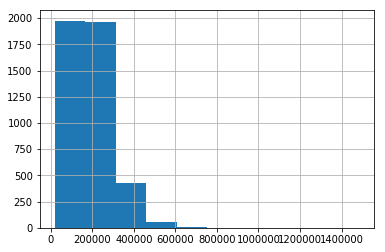

In [13]:
hst = df[df['marital-status'].str.contains('Divorced')].fnlwgt.hist()

> Ответ: оно мне напоминает распределение Пуассона

# Правда ли, что большинство людей, из тех кто получает больше 50k, с высшим образованием  (BSc, MSc, PhD - ????)

In [14]:
from collections import Counter
val50 = df[df['result'].str.contains('>50K')]['education']
cnt = Counter(val50.values)
result = 'Правда' if (cnt['Masters'] + cnt['Bachelors'] + cnt['Doctorate']) / len(val50) > 0.5 else 'Нет'
result

'Нет'

> Ответ: Правда / Нет.

# Сколько в среднем работают люди в неделю в зависимости от education?

In [15]:
df.groupby('education')['hours-per-week'].mean()

education
10th            37.052519
11th            33.925957
12th            35.780600
1st-4th         38.255952
5th-6th         38.897898
7th-8th         39.366873
9th             38.044747
Assoc-acdm      40.504217
Assoc-voc       41.610709
Bachelors       42.614006
Doctorate       46.973366
HS-grad         40.575374
Masters         43.836332
Preschool       36.647059
Prof-school     47.425347
Some-college    38.852284
Name: hours-per-week, dtype: float64

# Кто больше работает в неделю - мужчины или женщины?

In [16]:
m_or_w = df.groupby('sex')['hours-per-week'].mean()
print(m_or_w)
print("Maximum is:", m_or_w.max())

sex
Female    36.410361
Male      42.428086
Name: hours-per-week, dtype: float64
Maximum is: 42.42808627810923


# Кто больше работает в неделю - те кто в отношениях или те кто нет?

In [17]:
m_or_w = df.groupby('marital-status')['hours-per-week'].mean()
married_list = ['Married-AF-spouse','Married-civ-spouse','Married-spouse-absent']
marr_mean = m_or_w.loc[married_list].mean()
not_marr_mean = m_or_w.loc[[item for item in list(m_or_w.keys()) if item not in married_list]].mean()
result = "В отношениях" if marr_mean > not_marr_mean else "Те, кто не в отношениях"
result

'В отношениях'

# Из каких стран люди работают farmers/fishers?

In [22]:
a = df[['occupation', 'native-country']]
list(a[a['occupation'] == 'Farming-fishing'].drop_duplicates(subset=['native-country'])['native-country'])

['United-States',
 'Cambodia',
 'Poland',
 'Guatemala',
 'Mexico',
 'England',
 '?',
 'Philippines',
 'Italy',
 'Puerto-Rico',
 'Vietnam',
 'Germany',
 'Japan',
 'Canada',
 'Yugoslavia',
 'Cuba',
 'Portugal',
 'El-Salvador',
 'Hong',
 'Ireland',
 'France']

# Сколько максимум работают люди в неделю? Как много таких людей кто работает наибольшее количество часов? Какой у них доход (распечатать)?

In [19]:
max_hours = df['hours-per-week'].max()
print(max_hours)

99
85
<=50K    60
>50K     25
Name: result, dtype: int64


In [20]:
how_much = len(df[df['hours-per-week'] == max_hours].index)
print(how_much)

85


In [21]:
how_result = df[df['hours-per-week'] == max_hours]['result'].value_counts()
print(how_result)

<=50K    60
>50K     25
Name: result, dtype: int64
